In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

Загружаю файл с данными

# ДЗ 

    Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data.describe()
#Смотрю описательную статистику файла

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


Смотрю общий вид изменения ключевого свойства файла

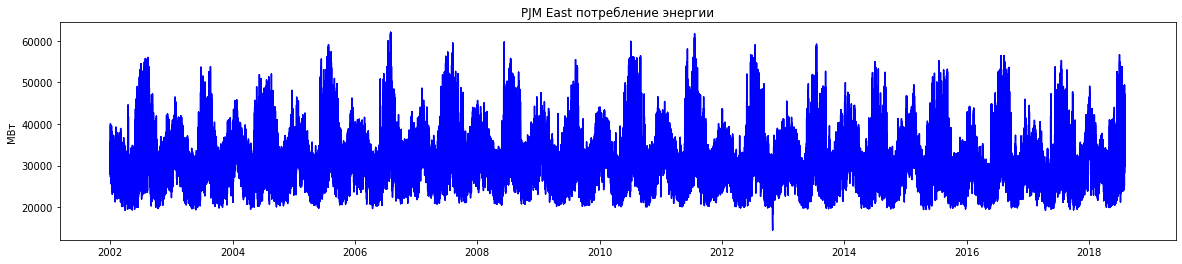

In [6]:
plt.figure(figsize =(20,4))
plt.plot(data.index, data['PJME_MW'], 'b')
plt.title('PJM East потребление энергии')
plt.ylabel('МВт')
plt.show()

Произвожу ресемплинг данных в представление по одному месяцу

In [10]:
data_m = data.resample('M').mean()
# brent_data_m = brent_data.resample('M').mean()

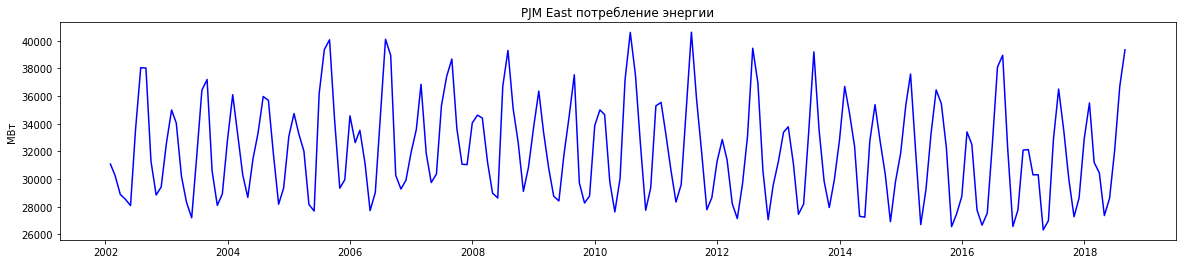

In [11]:
plt.figure(figsize =(20,4))
plt.plot(data_m.index, data_m['PJME_MW'], 'b')
plt.title('PJM East потребление энергии')
plt.ylabel('МВт')
plt.show()

Решение задачи с помощью модели ARIMA

In [53]:
data_m_4_arima = pd.DataFrame(data = data_m["PJME_MW"])
data_m_4_arima

,PJME_MW
Date,
2002-01-31,31075.399731
2002-02-28,30239.166667
2002-03-31,28875.256720
2002-04-30,28534.731572
2002-05-31,28073.653226
2002-06-30,33585.919444
2002-07-31,38041.896505
2002-08-31,38014.021505
2002-09-30,31281.468056


Превращаю датафрейм пандас в список массивов numpy для подачи его в модель ARIMA

In [57]:

# data_m_4_arima_numpy = data_m_4_arima.to_numpy()
# data_m_4_arima_numpy_final = []
# for i in range(len(data_m_4_arima_numpy)):
#     data_m_4_arima_numpy_final.append(data_m_4_arima_numpy[i])
    

# data_m_4_arima_numpy_final



In [58]:
# data_m_4_arima_numpy_final

In [61]:
data_d = data.copy().resample('D').mean()
data_w = data.resample('W').mean()
data_Y = data.resample('3M').mean()
data_m = data.resample('M').mean()

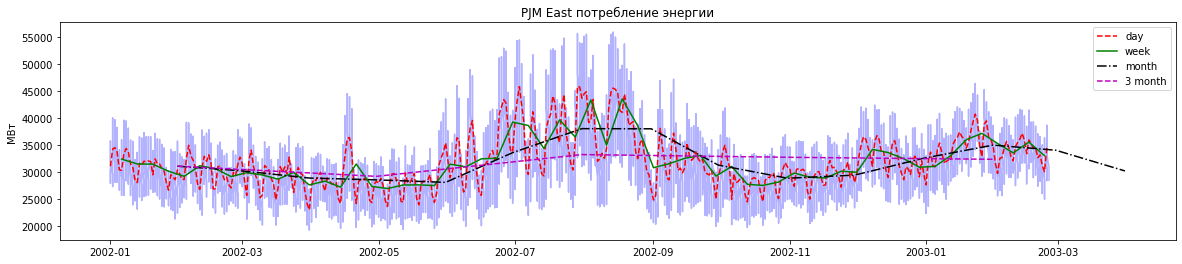

In [62]:
plt.figure(figsize =(20,4))
plt.plot( data.index[:5*24*7*4*3], data['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot( data_d.index[:5*7*4*3], data_d['PJME_MW'].values[:5*7*4*3], '--r',label='day' )
plt.plot( data_w.index[:5*4*3], data_w['PJME_MW'].values[:5*4*3], 'g',label='week'  )
plt.plot( data_m.index[:5*3], data_m['PJME_MW'].values[:5*3], '-.k',label='month'  )
plt.plot( data_Y.index[:5], data_Y['PJME_MW'].values[:5], '--m',label='3 month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

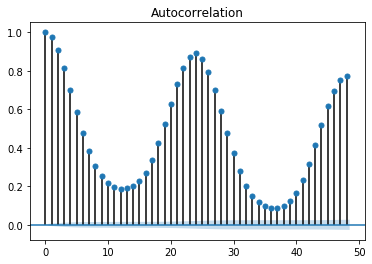

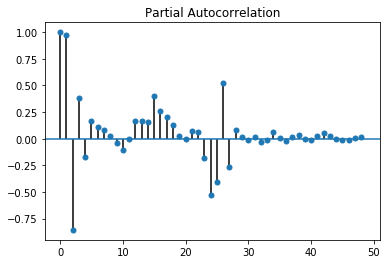

In [63]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data['PJME_MW'].values, lags=24*2)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data['PJME_MW'].values, lags=24*2)
plt.show()

Для месячных значений

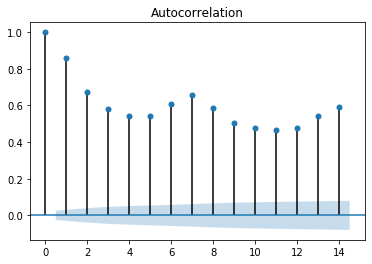

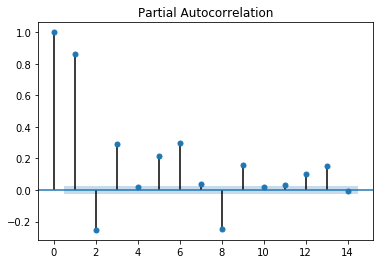

In [65]:
sm.graphics.tsa.plot_acf(data_d['PJME_MW'].values, lags=14)
plt.show()
sm.graphics.tsa.plot_pacf(data_d['PJME_MW'].values, lags=14)
plt.show()

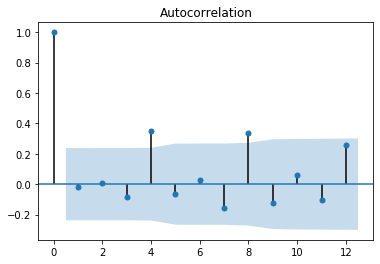

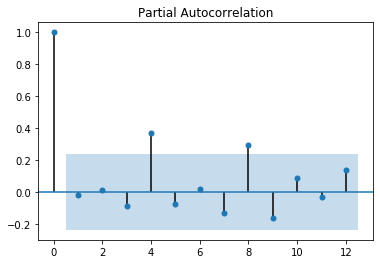

In [66]:
sm.graphics.tsa.plot_acf(data_Y['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_Y['PJME_MW'].values, lags=12)
plt.show()

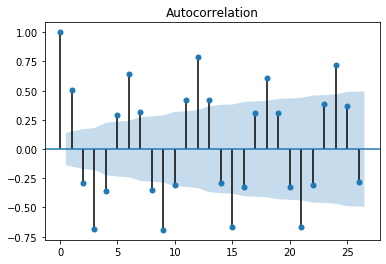

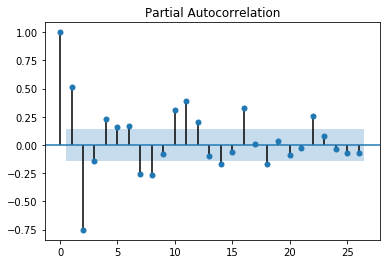

In [67]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=26)
plt.show()

In [68]:
import warnings

# Определим p, d и q 
q = 2
p = 1
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель
qs = 1
ps = 0
ds = 1
seasonal_pdq = [ps, ds, qs ,6] 

In [69]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [1, 2, 2]    : ps,ds,qs, S= [0, 1, 1, 6]


In [74]:
#для построения модели используем все данные, кроме 12-х последних недель (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-3],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))


SARIMAX[1, 2, 2]x[0, 1, 1, 6] - AIC:3300.035288534138


In [75]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  197
Model:             SARIMAX(1, 2, 2)x(0, 1, 1, 6)   Log Likelihood               -1645.018
Date:                           Wed, 22 Jan 2020   AIC                           3300.035
Time:                                   12:43:30   BIC                           3316.000
Sample:                                        0   HQIC                          3306.508
                                           - 197                                         
Covariance Type:                             opg                                         
========================================================================================= ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

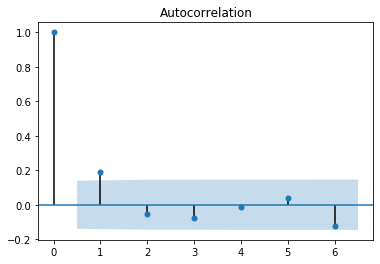

In [76]:
sm.graphics.tsa.plot_acf(results.resid, lags=6)
plt.show()

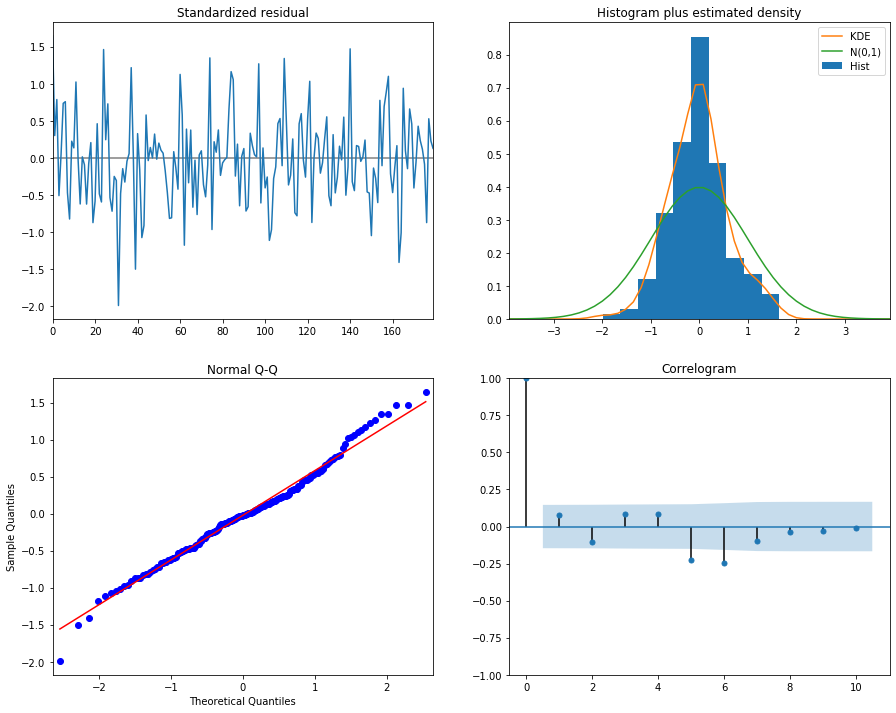

In [77]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# ДЗ

    Подберите параметры модели SARIMAX для этого ряда.

In [78]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)
SARIMAX: (0, 0, 2) x (0, 1, 1, 6)


In [86]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 6)3 - AIC:4156.427324595833
ARIMA(0, 0, 0)x(0, 0, 2, 6)3 - AIC:3987.7302382236094
ARIMA(0, 0, 0)x(0, 1, 0, 6)3 - AIC:3398.419994288184
ARIMA(0, 0, 0)x(0, 1, 1, 6)3 - AIC:3208.774303336635
ARIMA(0, 0, 0)x(0, 1, 2, 6)3 - AIC:3048.9339118136804
ARIMA(0, 0, 0)x(0, 2, 0, 6)3 - AIC:3505.8750620848728
ARIMA(0, 0, 0)x(0, 2, 1, 6)3 - AIC:3266.1275350258784
ARIMA(0, 0, 0)x(0, 2, 2, 6)3 - AIC:3114.8410244073034
ARIMA(0, 0, 0)x(1, 0, 0, 6)3 - AIC:3423.7999568485316
ARIMA(0, 0, 0)x(1, 0, 1, 6)3 - AIC:3393.1202246102202
ARIMA(0, 0, 0)x(1, 0, 2, 6)3 - AIC:3176.738838353062
ARIMA(0, 0, 0)x(1, 1, 0, 6)3 - AIC:3149.157409332891
ARIMA(0, 0, 0)x(1, 1, 1, 6)3 - AIC:3131.6099376403276
ARIMA(0, 0, 0)x(1, 1, 2, 6)3 - AIC:3021.721425923679
ARIMA(0, 0, 0)x(1, 2, 0, 6)3 - AIC:3179.2056399168837
ARIMA(0, 0, 0)x(1, 2, 1, 6)3 - AIC:3152.004554296192
ARIMA(0, 0, 0)x(1, 2, 2, 6)3 - AIC:3009.220879554842
ARIMA(0, 0, 0)x(2, 0, 0, 6)3 - AIC:31

Я получил минимальное значение при ARIMA(1, 1, 2)x(1, 2, 2, 6)3 - AIC:2875.105304535908

In [88]:
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=[1,1,2],
                                seasonal_order=[1,2,2,6] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2875.105304535908


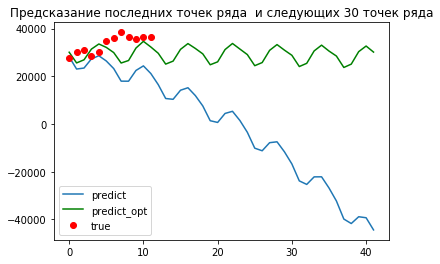

In [89]:
pred_dynamic = results.forecast(42)    #делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(42)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_w['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

# ДЗ
    Сделайте вывод о том, как изменилась модель по сравнению с недельной.